In [35]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (10, 5))

In [36]:
datos = pd.read_csv('alquiler_residencial_nuevos_val.csv', sep = ';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Departamento
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Departamento
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,16.67,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,50.00,Departamento


In [37]:
#box-plot metodologia

<Axes: >

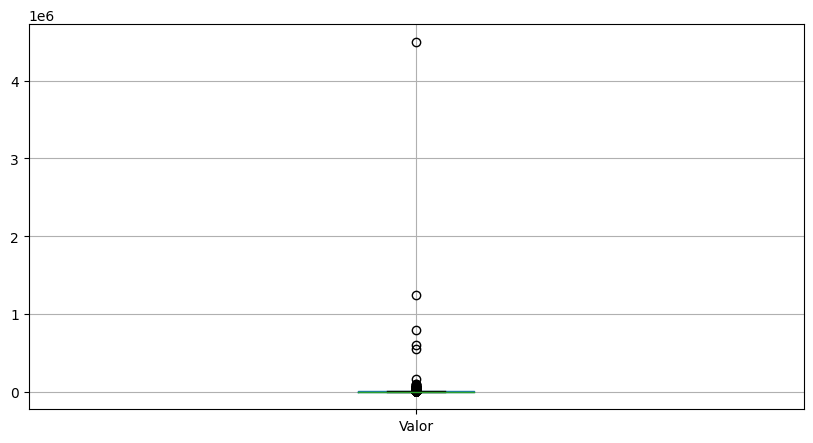

In [38]:
#creando box-plot
datos.boxplot(['Valor'])

In [39]:
#buscando datos mayores a 500000
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
7731,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
10774,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Departamento
12822,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
14023,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
15715,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [40]:
#variable valor
valor = datos['Valor']

In [41]:
#ejecutando cuartiles
#ejemplo buscar
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [42]:
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))

In [43]:
datos_new = datos[seleccion]

<Axes: >

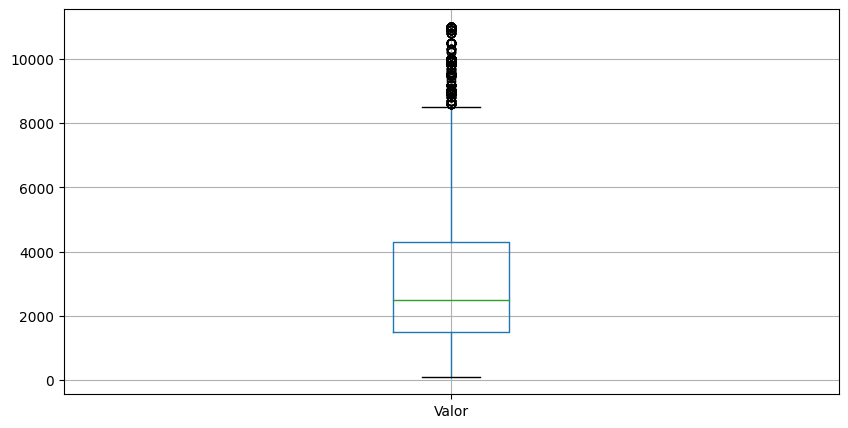

In [44]:
#generando box plot con cuartiles de tabla antigua
datos_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

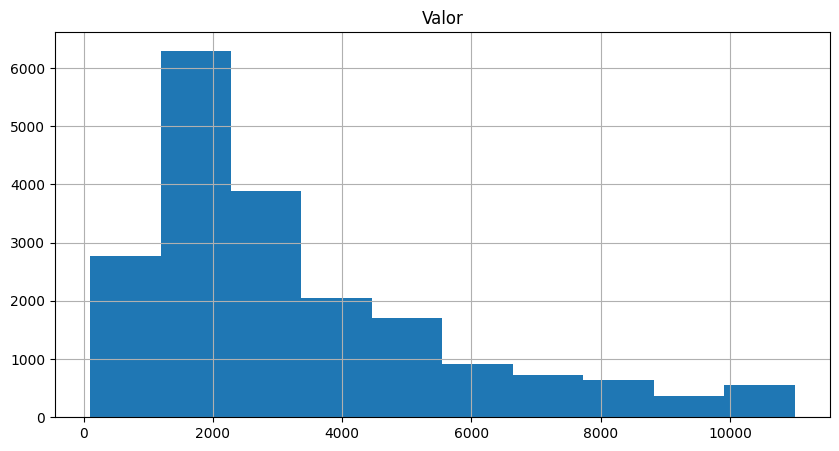

In [45]:
#generando historico con tabla nueva
datos_new.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

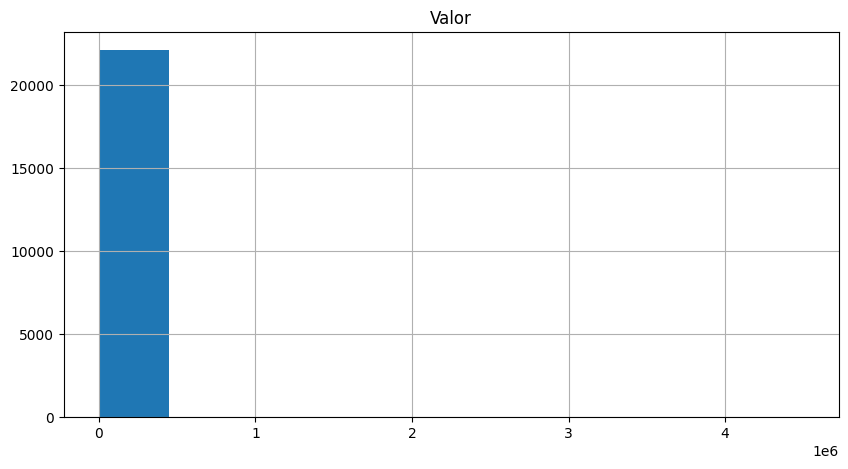

In [46]:
#generando historico con tabla antigua
datos.hist(['Valor'])

#Identificando y Exluyendo Outliers

<Axes: >

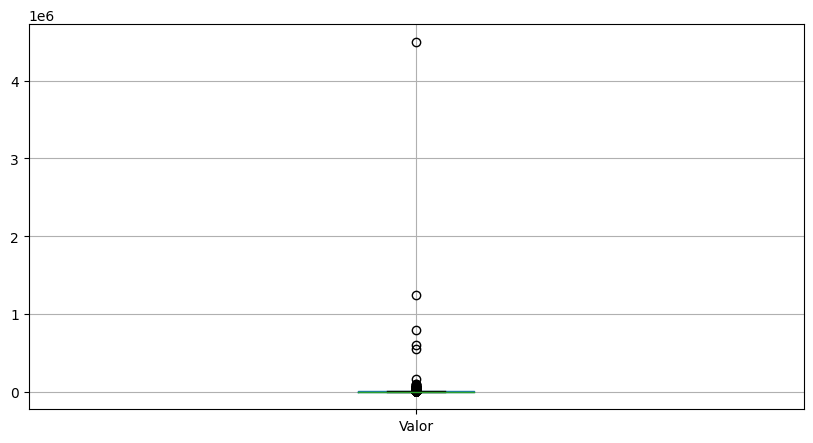

In [47]:
#generando box-plot
datos.boxplot(['Valor'])

In [48]:
#revisando data frame
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Departamento
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Departamento
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,16.67,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,50.00,Departamento


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

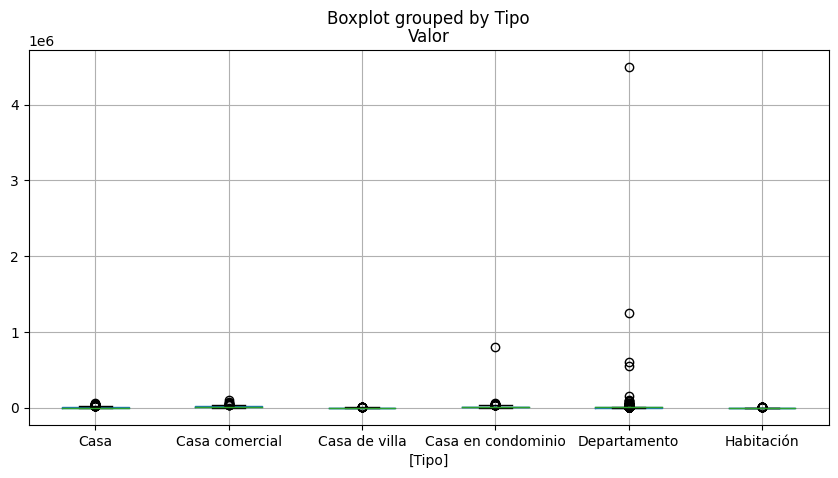

In [49]:
#generando box-plot generando limites por tipo de local
datos.boxplot(['Valor'], by = ['Tipo'])

In [51]:
#creando box-plot segun local
grupo_tipo = datos.groupby('Tipo')

In [52]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [53]:
#modificando para que solo almacene el valor(columna)
grupo_tipo = datos.groupby('Tipo')['Valor']

In [54]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [56]:
#ver atributos
grupo_tipo.groups

{'Casa': [1, 22, 54, 57, 97, 101, 146, 162, 182, 241, 253, 256, 267, 289, 313, 319, 338, 343, 361, 382, 389, 403, 428, 438, 479, 480, 486, 517, 548, 549, 574, 579, 580, 626, 630, 639, 644, 645, 670, 686, 710, 731, 734, 771, 782, 792, 869, 886, 953, 999, 1046, 1053, 1136, 1141, 1143, 1175, 1196, 1268, 1275, 1336, 1355, 1370, 1391, 1434, 1448, 1452, 1463, 1468, 1495, 1498, 1511, 1611, 1629, 1681, 1687, 1691, 1696, 1709, 1734, 1742, 1787, 1836, 1861, 1901, 1931, 1959, 1968, 1987, 2046, 2066, 2083, 2102, 2128, 2134, 2135, 2160, 2198, 2229, 2232, 2239, ...], 'Casa comercial': [58, 138, 195, 327, 454, 491, 565, 578, 627, 649, 768, 784, 828, 910, 912, 914, 975, 1061, 1206, 1317, 1401, 1423, 1457, 1521, 1536, 1790, 1976, 2194, 2522, 2549, 2569, 2618, 2626, 2669, 2696, 2832, 2904, 2979, 3135, 3146, 3159, 3249, 3324, 3376, 3378, 3389, 3398, 3613, 3881, 3934, 3994, 4038, 4049, 4510, 4594, 4791, 4818, 4875, 4953, 4980, 5010, 5069, 5092, 5124, 5272, 5326, 5330, 5331, 5399, 5429, 5554, 5673, 5748, 5

In [57]:
#ejecutando cuartiles
#ejemplo buscar
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [58]:
Q1

Tipo
Casa                  1100.0
Casa comercial        6000.0
Casa de villa          750.0
Casa en condominio    4000.0
Departamento          1700.0
Habitación             900.0
Name: Valor, dtype: float64

In [59]:
limite_inferior

Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3250.0
Habitación                0.0
Name: Valor, dtype: float64

In [60]:
limite_superior

Tipo
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento           9950.0
Habitación             2400.0
Name: Valor, dtype: float64

In [ ]:
#CREANDO DATA FRAME
datos_new = pd.DataFrame()
#grabar datos con for
for tipo in grupo_tipo.group.keys():
  eh_tipo = datos['Tipo'] == tipo
  eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
  seleccion = eh_tipo & eh_dentro_limite
  datos_seleccion = datos[seleccion]
  datos_new = pd.concat([datos_new, datos_seleccion])